In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Inventory problem.
Demand is a random variable sampled at each time t from a distribution. The goal is to find the optimal policy to place orders for an item. There is a fixed cost for placing an order and a quantity proportional cost. 

MDP formulation:
$$ X_{t+1} = (X_t + S_t - D_t)^+ $$

In [28]:
import numpy as np
import matplotlib.pyplot as plt

max_size = 30
A = [i for i in range(max_size + 1)] # action space
holding_price = 1
selling_price = 3
cost_price = 1
k = 2  # base fixed cost
gamma = 0.9  # discount factor
convergence_threshold = 1e-6

def cost(a):
    return cost_price * a + (k if a > 0 else 0)  

def reward(x, a, d):
    return selling_price * min(x + a, d) - holding_price * x - cost(a)  

def poisson_prob(l, d):
    return np.exp(-l)*l**d/math.factorial(d)  # poisson distributed demand
def uniform_prob(d):
    return 1/max_size  # uniform demand

demand_prob = [uniform_prob(d) for d in range(max_size + 1)]  # demand probability

V = np.zeros(max_size + 1)

while True:
    delta = 0
    V_new = V.copy()

    for x in range(max_size + 1):
        best_value = float('-inf')

        for a in A:
            expected_value = 0

            for d in range(max_size + 1):  # expectation of value over the demand
                x_next = max(0, min(max_size, x + a - d))
                expected_value += demand_prob[d] * (reward(x, a, d) + gamma * V[x_next])

            best_value = max(best_value, expected_value)

        V_new[x] = best_value
        delta = max(delta, abs(V_new[x] - V[x]))

    V = V_new
    if delta < convergence_threshold:
        break


policy = np.zeros(max_size + 1)
for x in range(max_size + 1):
    best_value = float('-inf')

    for a in A:
        expected_value = 0

        for d in range(max_size + 1):  # expectation of value over the demand
            x_next = max(0, min(max_size, x + a - d))
            expected_value += demand_prob[d] * (reward(x, a, d) + gamma * V[x_next])

        if expected_value > best_value:
            best_value = expected_value
            policy[x] = a




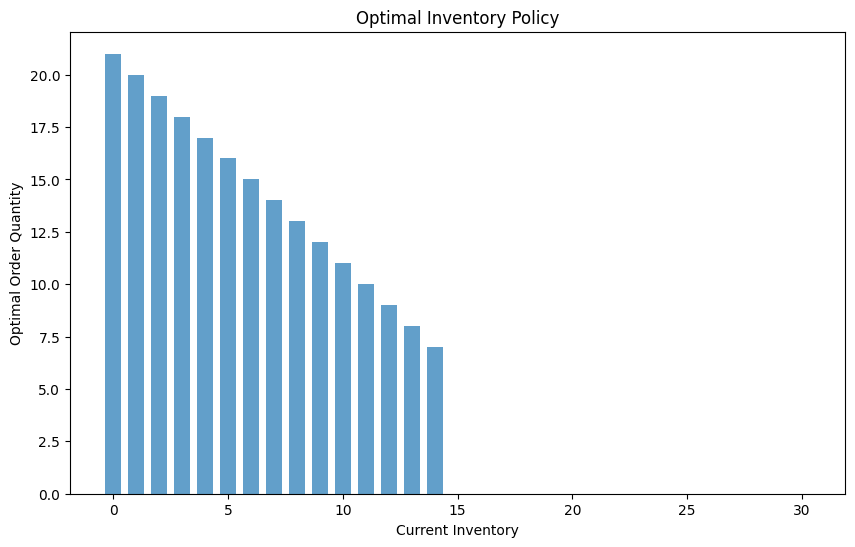

In [27]:
plt.bar(range(max_size + 1), policy, width=0.7, align='center', alpha=0.7)
plt.xlabel("Current Inventory")
plt.ylabel("Optimal Order Quantity")
plt.title("Optimal Inventory Policy")
plt.gcf().set_size_inches(10, 6)
plt.show()